# Точка максимума функции (лабораторная работа №7)
Выполнил Кирилл Чекушев

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Функция двух переменных, заданная в задании
def f(x1, x2):
    return (-1/3*x1**2) + (-1/6*x1*x2) + (127/6*x1) + \
           (-1/3*x2**2) + (91/6*x2) - 239/2

# Создание функции квадратичной интерполяции по трем точкам
def interp(x1, x2, x3, y1, y2, y3):
    return lambda x: y1*(x-x2)*(x-x3)/(x1-x2)/(x1-x3) + \
                     y2*(x-x1)*(x-x3)/(x2-x1)/(x2-x3) + \
                     y3*(x-x1)*(x-x2)/(x3-x1)/(x3-x2)

# Метод покоординатного спуска
Для одномерной минимизации используется метод квадратичной интерполяции; для поиска интервала унимодальности используется алгоритм скользящего окна.

Пусть задана функция от двух переменных:
$$ f = f(x_1, x_2) $$

Метод покоординатного спуска заключается в том, что в процессе итерации одна из координат (пусть для определенности координата $x_1=C$) фиксируется, и задача на данном этапе итерации заключается в том, чтобы найти такое $x_2'$, что функция $g(x_2)=f(C,x_2')$ принимает минимальное (максимальное) значение для данной фиксированной координаты $x_1=C$.

На каждом этапе итерации для каждой из координат (при другой фиксированной) функция $f(C, x_2)=g(x_2)$ интерполируется параболой, и дальше на параболе происходит поиск интервала унимодальности методом скользящего окна.

Метод скользящего окна на прямой заключается в том, что в начальной точке $x$ определяется направления убывания (возростания) функции. Затем происходит проверка $g(x+h) > g(x) > g(x-h)$ ($g(x+h) < g(x) < g(x-h)$). Если это условие выполняется, то найден интервал унимодальности $(x+h, x-h)$. В противном случае, координата смещается в направлении, определенном в начале на расстояние, равное $h$, и проверка происходит до тех пор, пока условие не будет выполнено.

Точкой максимума функции является (27.80000000000026, 15.80000000000009)


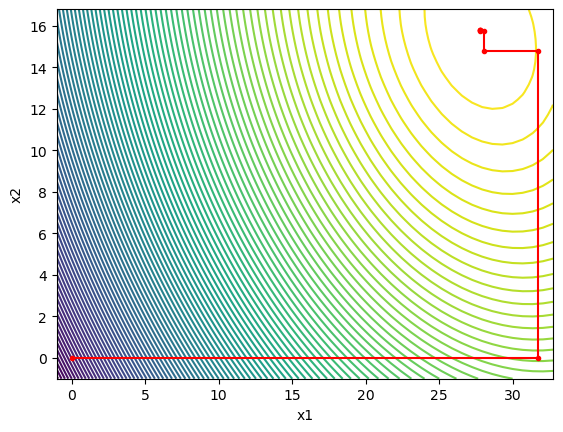

In [3]:
# Шаг интерполяции
h = 1e-2

# Шаг скользящего окна
g = 5e-2

# Точность по значению функции
eps = 1e-2

# Задание начального положения точки
x1, x2 = 0, 0

# Создание массива для точек траектории поиска максимума
x1_traektoria = []
x2_traektoria = []

# Добавление начальной точки в траекторию
x1_traektoria.append(x1)
x2_traektoria.append(x2)

# Создание переменных для нынешнего и предыдущего значения функции 
# (понадобится для определения сходимости)
f_seychas = f(x1, x2)
f_staroe = f_seychas + 1e10

while True:
    
    # Шаг по х1, фиксация х2
    # Вычисление значения в 3 соседних точках для создания квадратичной интерполяции
    f1 = f(x1+h, x2)
    f2 = f(x1, x2)
    f3 = f(x1-h, x2)
    
    # Создание функции квадратичной интерполяции по 3 точкам
    inperp_x1 = interp(x1+h, x1, x1-h, f1, f2, f3)
    
    # Определение направления движения к максимуму
    if f1 > f2: 
        direction = 1
    else:
        direction = -1
    
    # Создание трех точек скользящего окна 
    x1_okno_1 = x1+g
    x1_okno_2 = x1
    x1_okno_3 = x1-g
    
    # Цикл скольжения окна 
    while True:
        
        # Определение значения интерполяционной функции в этих трех точках
        f_okno_1 = inperp_x1(x1_okno_1)
        f_okno_2 = inperp_x1(x1_okno_2)
        f_okno_3 = inperp_x1(x1_okno_3)
        
        # Проверка, является ли средняя точка максимальной
        if (f_okno_2 > f_okno_1) and (f_okno_2 > f_okno_3):
            
            # Если средняя точка является максимальной, то она 
            # берется за новое значение х1
            x1 = x1_okno_2
            break
            
        # Если средняя точка не является максимальной, то окно скользит 
        # в направлении возростания функции
        x1_okno_1 += g*direction 
        x1_okno_2 += g*direction 
        x1_okno_3 += g*direction 
    
    # Добавление новой точки с модифицированными координатами
    x1_traektoria.append(x1)
    x2_traektoria.append(x2)
    
    # Аналогичные действия выполняются для второй координаты
    f1 = f(x1, x2+h)
    f2 = f(x1, x2)
    f3 = f(x1, x2-h)
    
    inperp_x2 = interp(x2+h, x2, x2-h, f1, f2, f3)
    
    if f1 > f2: 
        direction = 1
    else:
        direction = -1
    
    x2_okno_1 = x2+g
    x2_okno_2 = x2
    x2_okno_3 = x2-g
    
    while True:
        
        f_okno_1 = inperp_x2(x2_okno_1)
        f_okno_2 = inperp_x2(x2_okno_2)
        f_okno_3 = inperp_x2(x2_okno_3)
        
        if (f_okno_2 > f_okno_1) and (f_okno_2 > f_okno_3):
            x2 = x2_okno_2
            break
        
        x2_okno_1 += g*direction 
        x2_okno_2 += g*direction 
        x2_okno_3 += g*direction 
    
    x1_traektoria.append(x1)
    x2_traektoria.append(x2)
    
    # Обновление переменных для нынешнего и предыдущего значения функции 
    f_staroe = f_seychas
    f_seychas = f(x1, x2)
    
    # Проверка сходимости к максимуму функции
    if abs(f_staroe-f_seychas) < eps:
        break
    
print(f'Точкой максимума функции является ({x1}, {x2})')

# Создание графика уровней функции
x1_min, x1_max = min(x1_traektoria), max(x1_traektoria), 
x2_min, x2_max = min(x2_traektoria), max(x2_traektoria)
X_setka = np.linspace(x1_min-1, x1_max+1, 50)
Y_setka = np.linspace(x2_min-1, x2_max+1, 50)
X, Y = np.meshgrid(X_setka, Y_setka)
Z = f(X, Y)
Z_setka = plt.contour(X, Y, Z, 100)

# Создание графика траектории 
plt.xlabel('x1'); plt.ylabel('x2')
plt.plot(x1_traektoria, x2_traektoria, '.r-')

# Метод случайного спуска 
Метод случайного поиска минимума (максимума) на плоскости заключается в том, что выбирается постоянная длина шага $h$ и случайное направление с углом $\theta$ и выполняется проверка $f(x_1, x_2) > f(x_1+h\cos(\theta),x_2+h\sin(\theta))$. Если данное условие выполняется, то координаты после выполнения шага переобохначаются за новые координаты, обнуляется счётччик неудачных шагов. В противном случае, увеличивается счётчик неудачных шагов. Когда счётчик шагов достигает некоторого предела, то точка $(x_1, x_2)$ принимается за точку минимума (максимума) функции.

Точкой максимума функции является (27.840789285494708, 15.804252054802555)


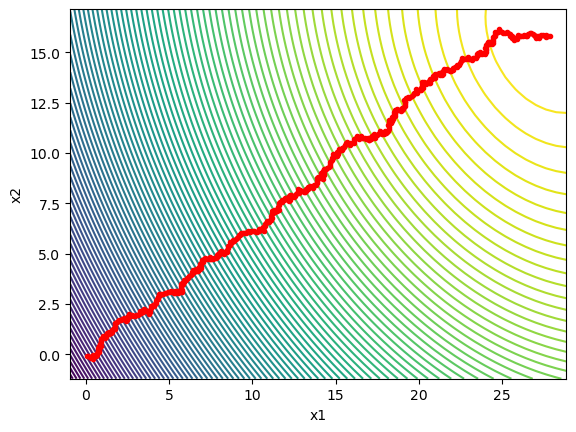

In [6]:
# Длина случайного шага
r = 1e-1

# Предел количества неудачных случайных шагов
n_predel = 100

# Начальная точка
x1, x2 = 0, 0

# Массивы для точек траектории
x1_traektoria = []
x2_traektoria = []

n = 0
while n < n_predel:
    
    # Расчёт случайного угла
    ugol = 2*np.pi * np.random.random()
    
    # Проверка, является ли случайных шаг удачным
    if f(x1, x2) < f(x1+r*np.cos(ugol), x2+r*np.sin(ugol)):
        
        # Если является, то обозначаем новые координаты
        x1 = x1+r*np.cos(ugol)
        x2 = x2+r*np.sin(ugol)
        
        # Сброс счётчика неудачных шагов
        n = 0
        
        # Добавление новой точки в массив траектории
        x1_traektoria.append(x1)
        x2_traektoria.append(x2)
        
    # Если является неудачной, то добавляем единицу к счётчику неудачных шагов
    n += 1

print(f'Точкой максимума функции является ({x1}, {x2})')

# Создание графика уровней функции
x1_min, x1_max = min(x1_traektoria), max(x1_traektoria), 
x2_min, x2_max = min(x2_traektoria), max(x2_traektoria)
X_setka = np.linspace(x1_min-1, x1_max+1, 50)
Y_setka = np.linspace(x2_min-1, x2_max+1, 50)
X, Y = np.meshgrid(X_setka, Y_setka)
Z = f(X, Y)
Z_setka = plt.contour(X, Y, Z, 100)

# Создание графика траектории 
plt.xlabel('x1'); plt.ylabel('x2')
plt.plot(x1_traektoria, x2_traektoria, '.r-')